In [32]:
import pandas as pd
import numpy as np
from ast import literal_eval
from wordcloud import WordCloud
import string
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [135]:
df1=pd.read_csv('minor 2/cross_platform_moviess.csv')

In [137]:
df1.head()
df1.drop('Unnamed: 0',axis=1)

,Title,Year of release,Runtime (mins),Genres,Platform
0,SabrinaOriginal,2018,114,Horror Movies,AmazonPrime
1,Sabrás qué Hacer Conmigo,2015,87,Dramas,AmazonPrime
2,Sad Hill Unearthed,2017,83,Documentaries,AmazonPrime
3,Sadece Sen,2014,105,Dramas,AmazonPrime
4,Saeed Mirza: The Leftist Sufi,2016,61,Biographical Documentaries,AmazonPrime
...,...,...,...,...,...
4745,SHOT! The Psycho-Spiritual Mantra of Rock,2016,98,Biographical Documentaries,Netflix
4746,SMOSH: The Movie,2015,83,Comedies,Netflix
4747,SPF-18,2017,75,Dramas,Netflix
4748,Saadey CM Saab,2015,131,Comedies,Netflix


In [142]:
df=df1
df.sample(10)

,Unnamed: 0,Title,Year of release,Runtime (mins),Genres,Platform
2055,2055,Swarg,1990,154 min,"Bollywood: Drama, Drama: Bollywood, World Cine...",AmazonPrime
795,795,The Testimony,2015,28,Crime Documentaries,AmazonPrime
2013,2013,Aadhi Raat Ke Baad,1965,137 min,"Bollywood, Bollywood: Drama, Drama, Drama: Bol...",AmazonPrime
1490,1490,Premachi Goshta,2013,128 min,"Drama: Romance, Romance: Drama, World Cinema: ...",AmazonPrime
1989,1989,Once More,1997,160 min,"Drama, Drama: Romance, World Cinema: Indian",AmazonPrime
1070,1070,When Love Happens,2014,109,African Movies,AmazonPrime
1932,1932,Any Given Sunday (1999),1999,150 min,"Drama, Sport: Football",AmazonPrime
4006,1834,Main Hoon Na,2004,171,Action & Adventure,Netflix
2870,698,Conspiracy Theory: Did We Land On The Moon?,2001,45,Documentaries,Netflix
2374,202,All the Boys Love Mandy Lane,2006,90,Dark Movies,Netflix


In [36]:
#df.sample(15)
#df.drop('index',axis=1)

In [143]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [144]:
stop_nltk = stopwords.words("english")

In [145]:
stop_updated = stop_nltk + list(punctuation) + ["tv","shows","british","american","new zealand","taiwanese","chinese","argentenian","malaysian","korean","indian"]

In [146]:
def  clean_txt(genres):
    tokens = word_tokenize(genres.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens 
               if term not in stop_updated and len(term) > 2] 
    res= " ".join(stemmed)
    res1= res.replace("show ","") 
    return res1

In [147]:
df['clean_genre'] = df.Genres.apply(clean_txt)
#df.head()

In [42]:
#df3.to_csv('Amazon Prime TV.csv')

In [148]:
genres_combined = " ".join(df.clean_genre.values)
#genres_combined

In [149]:
word_cloud = WordCloud(width=800,height=800,background_color='white').\
generate_from_text(genres_combined) 

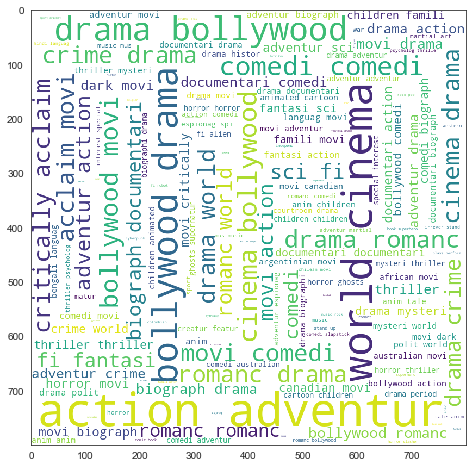

In [150]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)


In [151]:
all_terms = []
fdist = {}
all_terms = genres_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [152]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

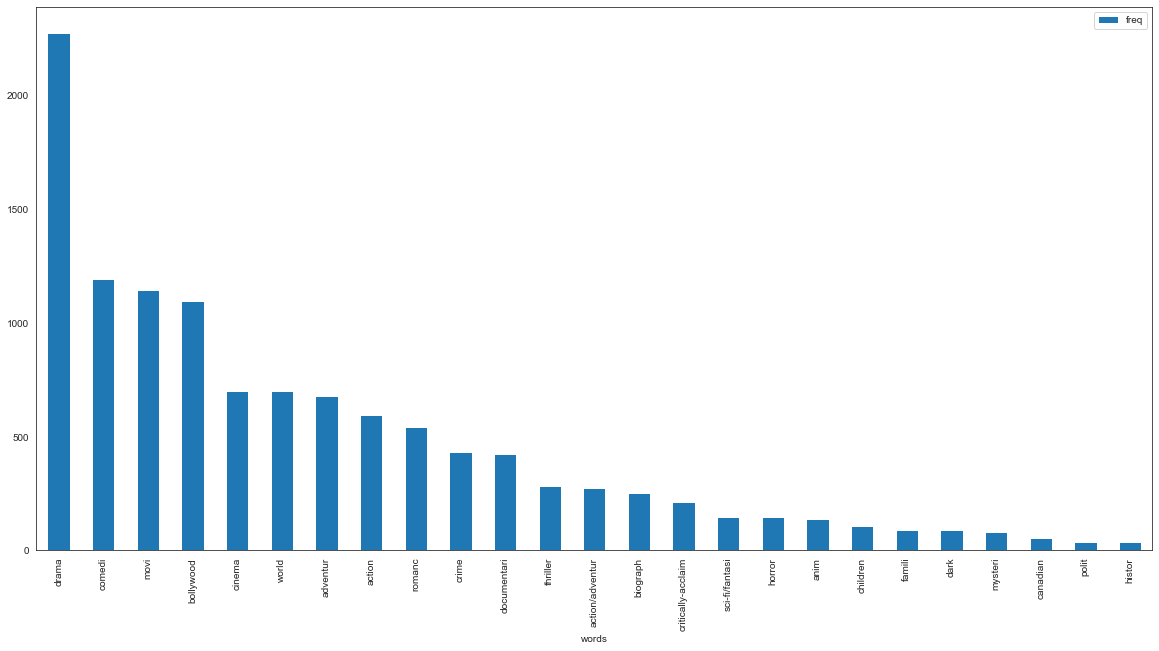

In [153]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,10)) 

In [154]:
df.head()

,Unnamed: 0,Title,Year of release,Runtime (mins),Genres,Platform,clean_genre
0,0,SabrinaOriginal,2018,114,Horror Movies,AmazonPrime,horror movi
1,1,Sabrás qué Hacer Conmigo,2015,87,Dramas,AmazonPrime,drama
2,2,Sad Hill Unearthed,2017,83,Documentaries,AmazonPrime,documentari
3,3,Sadece Sen,2014,105,Dramas,AmazonPrime,drama
4,4,Saeed Mirza: The Leftist Sufi,2016,61,Biographical Documentaries,AmazonPrime,biograph documentari


In [155]:
df = df.reset_index()
titles = df[['Title','Platform']]
indices = pd.Series(df.index, index=df['Title'])

In [51]:
#indices

In [156]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [166]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['clean_genre'])

In [167]:
tfidf_matrix.shape

(4750, 439)

In [168]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [169]:
cosine_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [179]:
get_recommendations('Aamir')

,Title,Platform
69,Secret Superstar,AmazonPrime
104,Shakti: The Power,AmazonPrime
106,Shanghai,AmazonPrime
107,Shararat,AmazonPrime
123,Shikari,AmazonPrime
133,Shortkut: The Con Is On,AmazonPrime
157,Singapore,AmazonPrime
197,Socha Na Tha,AmazonPrime
200,Sohni Mahiwal,AmazonPrime
221,Special 26,AmazonPrime


In [178]:
df.sample(10)

,index,Unnamed: 0,Title,Year of release,Runtime (mins),Genres,Platform,clean_genre
4075,4075,1903,Matichya Chuli,2006,132,Comedies,Netflix,comedi
2308,2308,136,Aamir,2008,95,Bollywood Movies,Netflix,bollywood movi
123,123,123,Shikari,1991,163,Bollywood Movies,AmazonPrime,bollywood movi
2591,2591,419,Betting on Zero,2017,104,Critically-acclaimed Movies,Netflix,critically-acclaim movi
1864,1864,1864,Yai Nee Romba Azhaga Irukey,2002,137 min,"Romance: Drama, World Cinema: Indian",AmazonPrime,romanc drama world cinema
2291,2291,119,A Year in Champagne,2014,82,Documentaries,Netflix,documentari
1287,1287,1287,Four Brothers,2005,108 min,"Action/Adventure: Crime, Drama: Crime",AmazonPrime,action/adventur crime drama crime
3009,3009,837,Dominion: Prequel to the Exorcist,2005,116,Horror Movies,Netflix,horror movi
2543,2543,371,BarryOriginal,2016,105,Dramas,Netflix,drama
4527,4527,2355,Players,2012,162,Action & Adventure,Netflix,action adventur
